In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Preprocess

In [ ]:
# Load data
df = pd.read_csv("Hotel Reservations.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Thong tin du lieu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Thong ke
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Null Columns

In [ ]:
# Check null
print(df.isnull().sum().sort_values(ascending = False))

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64


In [ ]:
# Check duplicated data
duplicated_rows=df.duplicated()
print(duplicated_rows)

quantity = duplicated_rows.sum()
print('Số hàng trùng lặp:',quantity)

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool
Số hàng trùng lặp: 0


In [ ]:
def columns(dataframe):
    discrete_columns = []
    continuous_columns = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique() <= 10:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

    return discrete_columns, continuous_columns

discrete_cols, continuous_cols = columns(df)
print("Cột dữ liệu rời rạc:", discrete_cols)
print("Cột dữ liệu liên tục:", continuous_cols)


Cột dữ liệu rời rạc: ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'booking_status']
Cột dữ liệu liên tục: ['no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']


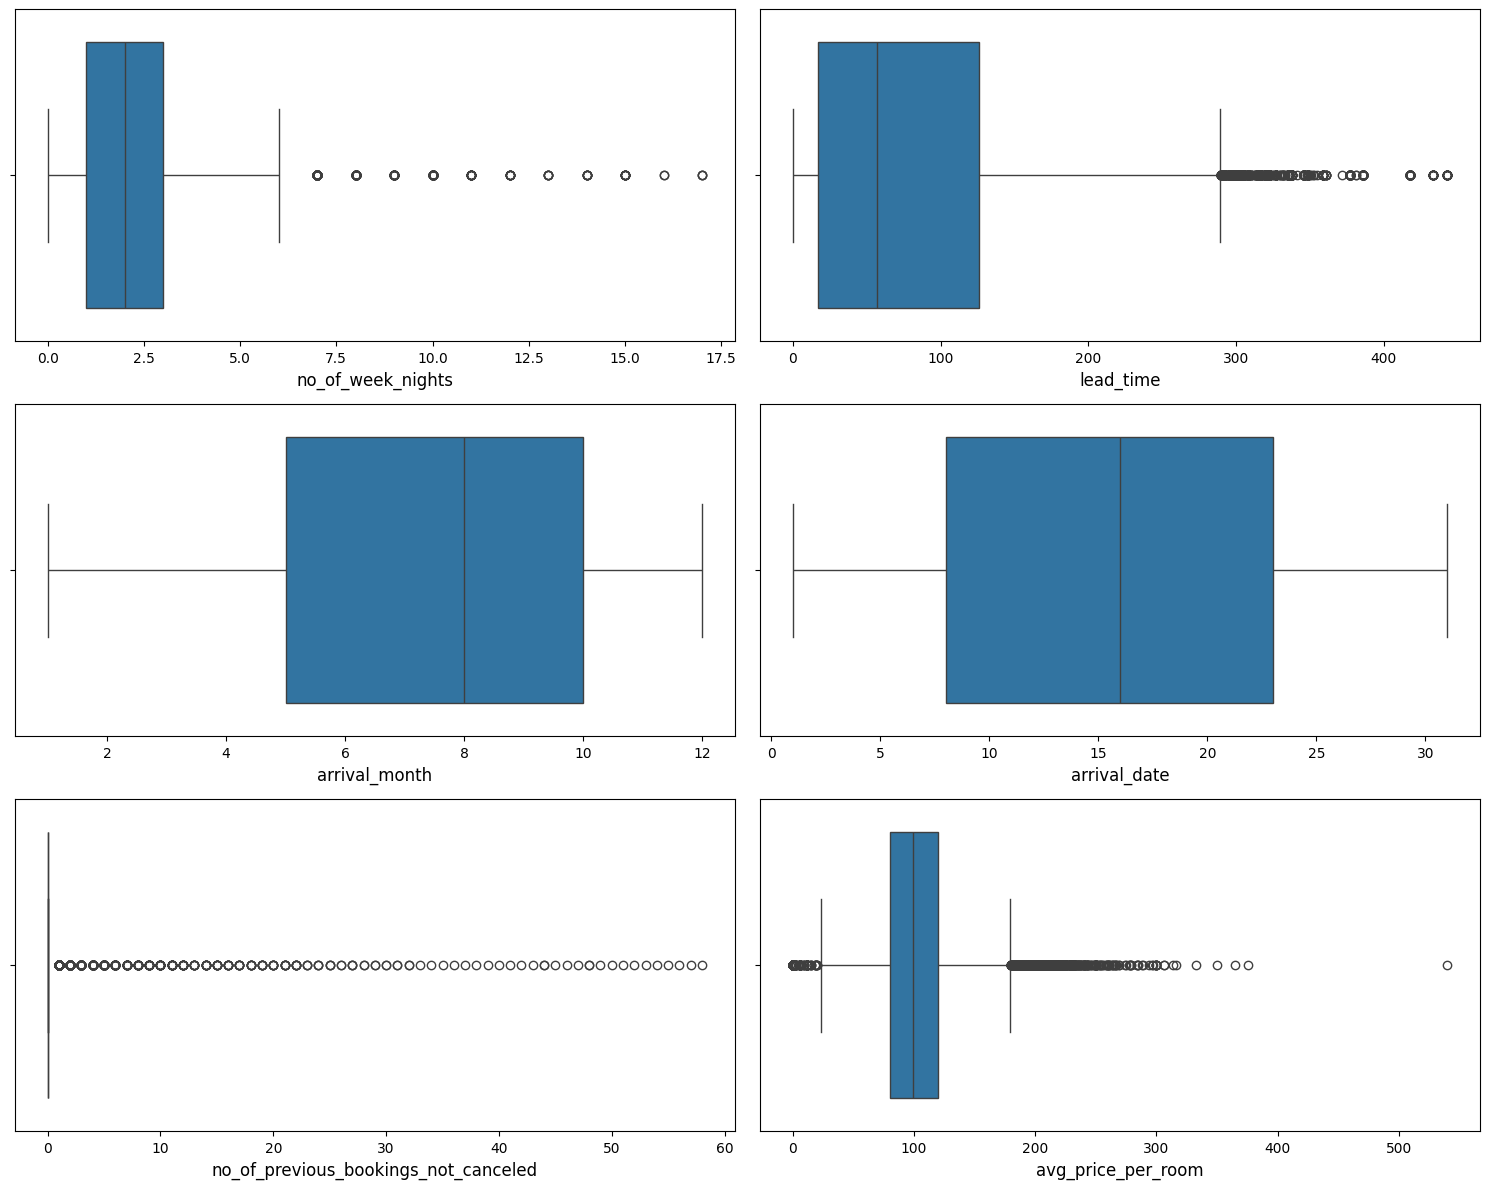

In [ ]:
# drop cột booking_ID
df =df.drop("Booking_ID", axis = 1)
# Chuyển cột 'avg_price_per_room' sang dạng số
df['avg_price_per_room'] = pd.to_numeric(df['avg_price_per_room'], errors='coerce')
df.dropna(inplace=True)

# Vẽ box plot
total_plots = len(continuous_cols)
columns_per_row = 2
rows = -(-total_plots // columns_per_row)
plt.figure(figsize=(15, 12))

for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


     Thay thế các giá trị ngoại lệ trong mỗi cột liên tục bằng giá trị trung bình.

     Thông số:
         - df(pd.DataFrame): DataFrame chứa dữ liệu.
         - Inner_multiplier (float): Hệ số nhân để xác định hàng rào bên trong. Mặc định là 1,5.
         -outer_multiplier(float): Hệ số nhân để xác định hàng rào bên ngoài. Mặc định là 3.0.

     Trả về:
         - df(pd.DataFrame): DataFrame với các ngoại lệ được thay thế bằng giá trị trung bình.

In [ ]:
def replace_outliers_with_mean(df: pd.DataFrame) -> pd.DataFrame:
    for col_name in continuous_cols:
        # Tính phạm vi liên tứ phân vị (IQR)
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1

        # Tính giới hạn dưới và giới hạn trên để thay thế các ngoại lệ
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR
        cap_lower_bound = Q1 - 3 * IQR
        cap_upper_bound = Q3 + 3 * IQR

        # Xác định các ngoại lệ
        outliers = (df[col_name] < lower_threshold) | (df[col_name] > upper_threshold) | \
                   (df[col_name] < cap_lower_bound) | (df[col_name] > cap_upper_bound)

        # Thay thế các ngoại lệ bằng giá trị trung bình
        df.loc[outliers, col_name] = round(df[col_name].mean())

    return df

df = replace_outliers_with_mean(df)

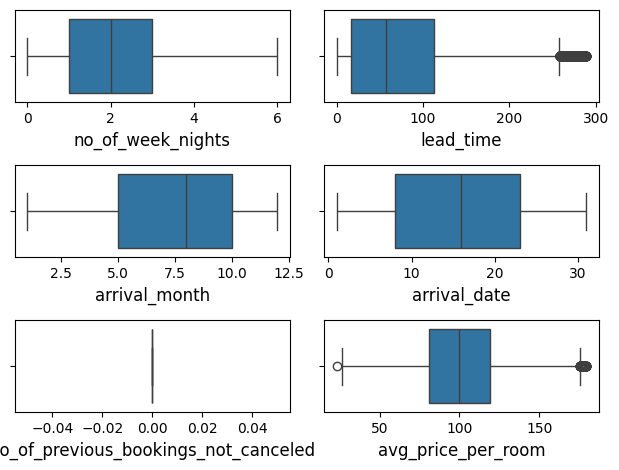

In [ ]:
# Vẽ lại box plot
for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# plt.figure(facecolor='w', figsize = (16,12))
# mask = np.tril(df.corr())
# sns.heatmap(df.corr(), annot = True, linewidth = 0.5, mask = mask, cmap = 'Blues')

# ML

PCA

     Áp dụng PCA cho các cột, tạo cột mới với thành phần chính và loại bỏ các cột ban đầu.

     Thông số:
         - df(pd.DataFrame): DataFrame chứa dữ liệu.
         - columns_to_pca(list): Danh sách tên cột áp dụng PCA.
         - new_column_name (str): Tên cho cột mới có thành phần chính.

     Trả về:
         - df (pd.DataFrame): DataFrame với PCA được áp dụng và các cột gốc bị loại bỏ.

In [ ]:
def pca_and_drop(df, columns_to_pca, new_column_name):
    pca = PCA(n_components=1)
    # Áp dụng PCA
    pca_result = pca.fit_transform(df[columns_to_pca])
    # Tạo một cột mới với thành phần chính
    df[new_column_name] = pca_result
    # Bỏ các cột ban đầu
    df.drop(columns=columns_to_pca, inplace=True)
    return df

# Áp dụng PCA cho "no_of_adults" và "no_of_children"
df = pca_and_drop(df, ["no_of_adults", "no_of_children"], "no_of_people")

# Áp dụng PCA cho "no_of_weekend_nights" và "no_of_week_nights"
df = pca_and_drop(df, ["no_of_weekend_nights", "no_of_week_nights"], "no_of_week_days")


Mã hóa dữ liệu categorical

In [ ]:
# Kiểm tra unique value trong các cột categorical
columns = ['type_of_meal_plan', 'room_type_reserved',
           'market_segment_type', 'booking_status']

for column in columns:
  unique_values = df[column].unique()
  print(f"\n{column}: \n{unique_values}\n")


type_of_meal_plan: 
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


room_type_reserved: 
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


market_segment_type: 
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


booking_status: 
['Not_Canceled' 'Canceled']



In [ ]:
# Mã hóa dữ liệu
def encode_categorical_columns(df, label_columns, ordinal_columns):
    label_encoder = LabelEncoder()
    ordinal_encoder = OrdinalEncoder()
    # label enocde
    df[label_columns] = df[label_columns].apply(label_encoder.fit_transform)
    # ordinal enocode
    df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
    return df

df = encode_categorical_columns(df, label_columns=["market_segment_type","type_of_meal_plan", "booking_status"], ordinal_columns=["room_type_reserved"])

In [ ]:
# Chia dữ liệu
target = 'booking_status'
X = df.drop(columns=[target], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước của dữ liệu huấn luyện: {X_train.shape[0]} hàng và {X_train.shape[1]} cột.")
print(f"Kích thước của dữ liệu thử nghiệm: {X_test.shape[0]} hàng và {X_test.shape[1]} cột.")

Kích thước của dữ liệu huấn luyện: 29020 hàng và 15 cột.
Kích thước của dữ liệu thử nghiệm: 7255 hàng và 15 cột.


In [ ]:
X_train.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people,no_of_week_days
25629,0,0,0.0,26,2017,10,17,4,0,0,0,161.00,0,0.120423,-1.068116
14473,0,0,0.0,98,2018,7,16,4,0,0,0,121.50,2,0.120423,-1.128576
23720,0,0,0.0,85,2018,9,8,3,0,0,0,70.00,0,0.158982,0.807305
5843,0,0,0.0,195,2018,8,8,3,0,0,0,72.25,0,0.158982,2.924567
18709,0,0,0.0,188,2018,6,15,3,0,0,0,130.00,0,-0.840274,-0.190865


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
# scaler = MinMaxScaler()
# Fit và transform training data
X_train = scaler.fit_transform(X_train)
# Transform testing data
X_test = scaler.transform(X_test)

Giải quyết vấn đề mất cân bằng lớp trong dữ liệu huấn luyện

Oversampling: Tăng số lượng quan sát trong lớp thiểu số

Undersampling: Giảm số lượng quan sát trong lớp đa số

In [ ]:
# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
# Kiểm tra cân bằng của dữ liệu trước Oversampling và Undersampling
class_counts = Counter(y_train)

# In số lượng mẫu của từng lớp
print("Số lượng mẫu của từng lớp trước Oversampling và Undersampling:")
print(class_counts)

# Kiểm tra cân bằng của dữ liệu sau Oversampling
class_counts_over = Counter(y_train_over)
print("Số lượng mẫu của từng lớp sau Oversampling:")
print(class_counts_over)

# Kiểm tra cân bằng của dữ liệu sau Undersampling
class_counts_under = Counter(y_train_under)

# In số lượng mẫu của từng lớp sau Undersampling
print("Số lượng mẫu của từng lớp sau Undersampling:")
print(class_counts_under)


Số lượng mẫu của từng lớp trước Oversampling và Undersampling:
Counter({1: 19551, 0: 9469})
Số lượng mẫu của từng lớp sau Oversampling:
Counter({1: 19551, 0: 19551})
Số lượng mẫu của từng lớp sau Undersampling:
Counter({0: 9469, 1: 9469})



     Hàm đánh giá các mô hình khác nhau bằng cách sử dụng cả oversampling và undersampling

     Thông số:
         - models (dict): Từ điển tên model và đối tượng model.

     Trả về:
         - results (pd.DataFrame): Một DataFrame
    
    In ra kết quả của mô hình và các độ đo đánh giá (Accuracy, Recall, Precision, F1).

    Parameters:
    - model: Mô hình đã được huấn luyện.
    - X_test: Dữ liệu thử nghiệm.
    - y_test: Nhãn thực tế của dữ liệu thử nghiệm.

In [ ]:
def train_models(models: dict):
    results = pd.DataFrame(columns=["Model", "Sampling Technique", "Accuracy", "Recall", "Precision", "F1"])

    for model_name, model in models.items():
        # Train model bằng oversample data
        model.fit(X_train_over, y_train_over)

        y_pred_over = model.predict(X_test)

        # Tính các thông số
        accuracy_over = round(accuracy_score(y_test, y_pred_over), 3)
        recall_over = round(recall_score(y_test, y_pred_over), 3)
        precision_over = round(precision_score(y_test, y_pred_over), 3)
        f1_over = round(f1_score(y_test, y_pred_over), 3)

        # lưu lại thành dataframe
        results = results.append({
            "Model": model_name,
            "Sampling Technique": "Oversampled",
            "Accuracy": accuracy_over,
            "Recall": recall_over,
            "Precision": precision_over,
            "F1": f1_over
        }, ignore_index=True)


        # Train model bằng undersample data
        model.fit(X_train_under, y_train_under)

        y_pred_under = model.predict(X_test)

        # Tính các thông số
        accuracy_under = round(accuracy_score(y_test, y_pred_under), 3)
        recall_under = round(recall_score(y_test, y_pred_under), 3)
        precision_under = round(precision_score(y_test, y_pred_under), 3)
        f1_under = round(f1_score(y_test, y_pred_under), 3)

        # lưu lại thành dataframe
        results = results.append({
            "Model": model_name,
            "Sampling Technique": "Undersampled",
            "Accuracy": accuracy_under,
            "Recall": recall_under,
            "Precision": precision_under,
            "F1": f1_under
        }, ignore_index=True)


    # Sắp xếp giảm dần độ chính xác
    results.sort_values(by="Accuracy", ascending=False, inplace=True)

    return results


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(random_state=42),
    "BaggingClassifier": BaggingClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=42),
}

In [ ]:
X_train


array([[-0.49139485, -0.18165226, -0.50672718, ..., -0.78836368,
         0.23346598, -0.86101081],
       [-0.49139485, -0.18165226, -0.50672718, ...,  1.75508423,
         0.23346598, -0.90969329],
       [-0.49139485, -0.18165226, -0.50672718, ..., -0.78836368,
         0.30777602,  0.64907369],
       ...,
       [-0.49139485, -0.18165226, -0.50672718, ...,  0.48336028,
         0.30777602, -0.15465104],
       [-0.49139485, -0.18165226, -0.50672718, ..., -0.78836368,
         0.30777602,  0.64907369],
       [-0.49139485, -0.18165226,  2.34768594, ..., -0.78836368,
         0.30777602, -0.15465104]])

In [ ]:
train_results = train_models(models)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
train_results

In [ ]:
# Tối ưu hóa model tốt nhất
gridsearch_model = RandomForestClassifier(random_state=42)
rf_params = {
        'criterion': ["gini", "entropy", "log_loss"],
        'max_features': ["sqrt", "log2", None],
}
grid_cls = GridSearchCV(gridsearch_model, param_grid=rf_params, cv=6, verbose=2)
grid_cls.fit(X_train, y_train)

In [ ]:
# In ra các tham số tối ưu
print("Best Parameters:", grid_cls.best_params_)

# Lấy mô hình tốt nhất từ GridSearchCV
best_model = grid_cls.best_estimator_

y_predict = best_model.predict(X_test)
print(classification_report(y_test, y_predict))

In [ ]:
matrix = confusion_matrix(y_test, y_predict)
matrix_df = pd.DataFrame(matrix, index=np.unique(df[target]), columns=np.unique(df[target]))
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất của mô hình trên tập kiểm thử
y_prob = grid_cls.predict_proba(X_test)[:, 1]

# Tính false positive rate (FPR), true positive rate (TPR) và ngưỡng (thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính diện tích dưới đường ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
